# Household energy consumption preliminary data analysis

## 0.0 Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.0 Data imports

Data import is from Kaggle:
https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london/data

In [2]:
# find local path
import os
path = '/home/adam/code/hramzan01/market'

In [3]:
#load first set of half hourly data
data_path = path + '/raw_data/halfhourdata/block_0.csv'
hour_data = pd.read_csv(data_path)
hour_data.head(10)

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0
5,MAC000002,2012-10-12 03:00:00.0000000,0
6,MAC000002,2012-10-12 03:30:00.0000000,0
7,MAC000002,2012-10-12 04:00:00.0000000,0
8,MAC000002,2012-10-12 04:30:00.0000000,0
9,MAC000002,2012-10-12 05:00:00.0000000,0


In [4]:
hour_data.shape

(1222670, 3)

In [5]:
# load household info data
house_path = path + '/raw_data/informations_households.csv'
house_data = pd.read_csv(house_path)
house_data.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [6]:
house_data.shape

(5566, 5)

In [7]:
# load acorn data
acorn_path = path + '/raw_data/acorn_details.csv'
acorn_data = pd.read_csv(acorn_path)
acorn_data.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


# 2.0 Compiling the data by ACORN

In [8]:
# merge time data with Acorn groups
df = hour_data.merge(house_data, how = 'left', left_on='LCLid', right_on='LCLid')
df.tail(5)

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file
1222665,MAC005492,2014-02-27 22:00:00.0000000,0.182,ToU,ACORN-,ACORN-,block_0
1222666,MAC005492,2014-02-27 22:30:00.0000000,0.122,ToU,ACORN-,ACORN-,block_0
1222667,MAC005492,2014-02-27 23:00:00.0000000,0.14,ToU,ACORN-,ACORN-,block_0
1222668,MAC005492,2014-02-27 23:30:00.0000000,0.192,ToU,ACORN-,ACORN-,block_0
1222669,MAC005492,2014-02-28 00:00:00.0000000,0.088,ToU,ACORN-,ACORN-,block_0


In [9]:
# find all entries which are Acorn A
df_A = df[df['Acorn'] == 'ACORN-A']
df_A

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-12 00:30:00.0000000,0,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-12 01:00:00.0000000,0,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-12 01:30:00.0000000,0,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-12 02:00:00.0000000,0,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-12 02:30:00.0000000,0,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...,...,...
1196185,MAC004431,2014-02-27 22:00:00.0000000,0.307,Std,ACORN-A,Affluent,block_0
1196186,MAC004431,2014-02-27 22:30:00.0000000,0.238,Std,ACORN-A,Affluent,block_0
1196187,MAC004431,2014-02-27 23:00:00.0000000,0.225,Std,ACORN-A,Affluent,block_0
1196188,MAC004431,2014-02-27 23:30:00.0000000,0.258,Std,ACORN-A,Affluent,block_0


In [15]:
# remove null values
df_A['energy(kWh/hh)'] = df_A['energy(kWh/hh)'].replace('Null', '0')
assert df_A['energy(kWh/hh)'][df_A['energy(kWh/hh)']=='Null'].count() == 0

/tmp/ipykernel_406022/4008904127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['energy(kWh/hh)'] = df_A['energy(kWh/hh)'].replace('Null', '0')


In [16]:
# convert time to string and energy column to numerical values
df_A['tstp'] = df_A['tstp'].astype("string")
df_A['energy(kWh/hh)'] = df_A['energy(kWh/hh)'].apply(pd.to_numeric)

/tmp/ipykernel_406022/2707565357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['tstp'] = df_A['tstp'].astype("string")
/tmp/ipykernel_406022/2707565357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['energy(kWh/hh)'] = df_A['energy(kWh/hh)'].apply(pd.to_numeric)


In [17]:
df_A['energy(kWh/hh)'][df_A['tstp'] == '2012-10-12 00:30:00.0000000'].mean()

0.37693103103448283

In [18]:
# find mean for each timestep
df_A_timeseries = df_A.groupby('tstp')['energy(kWh/hh)'].mean()

In [20]:
df_A_timeseries['2012-10-12 00:30:00.0000000']

0.3769310310344828

## 3.0 Plot the timeseries data

In [21]:
df_A_timeseries.index[0]

'2011-12-03 09:00:00.0000000'

In [26]:
a = 8012

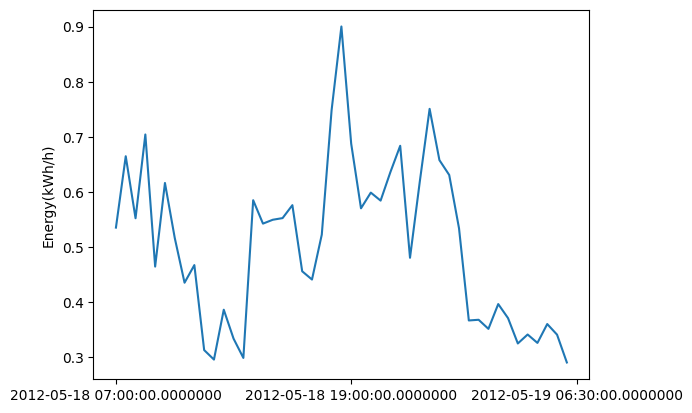

In [27]:
plt.plot(df_A_timeseries[a:a+47])
plt.xticks([df_A_timeseries.index[a], df_A_timeseries.index[a+24],df_A_timeseries.index[a+47]])
plt.ylabel('Energy(kWh/h)');